In [2]:
!pip install tensorflow



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test" 
data_val_path = "Fruits_Vegetables/test"

In [12]:
img_width = 180
img_height = 180

In [13]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width , img_height),
    batch_size = 32,
    validation_split = False)

Found 3115 files belonging to 36 classes.


In [14]:
data_cat = data_train.class_names

In [15]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [16]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size = (img_width , img_height),
    batch_size = 32,
    validation_split = False)

Found 359 files belonging to 36 classes.


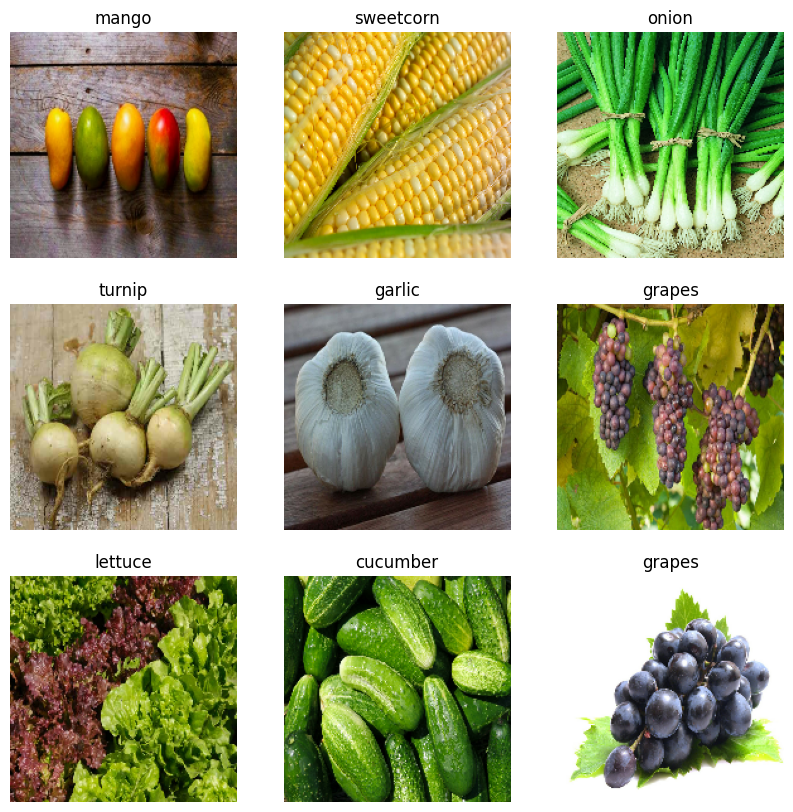

In [17]:
plt.figure(figsize=(10,10))
for image,label in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[label[i]])
        plt.axis('off')

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))               
])
    

In [21]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [22]:
epochs_size = 25
history = model.fit(data_train, validation_data = data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 280ms/step - accuracy: 0.0769 - loss: 3.6766 - val_accuracy: 0.3928 - val_loss: 2.2082
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.3107 - loss: 2.4512 - val_accuracy: 0.4986 - val_loss: 1.6342
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 235ms/step - accuracy: 0.4518 - loss: 1.9187 - val_accuracy: 0.7549 - val_loss: 0.9432
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 244ms/step - accuracy: 0.6153 - loss: 1.3487 - val_accuracy: 0.8245 - val_loss: 0.6535
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 227ms/step - accuracy: 0.7649 - loss: 0.8190 - val_accuracy: 0.8914 - val_loss: 0.5272
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 230ms/step - accuracy: 0.8540 - loss: 0.5095 - val_accuracy: 0.9248 - val_loss: 0.4045
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 234ms/step - accuracy: 0.9039 - loss: 0.3160 - val_accuracy: 0.9220 - val_loss: 0.4828
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 239ms/step - accuracy: 0.9274 - loss: 0.2799 - val_accu

Text(0.5, 1.0, 'Loss')

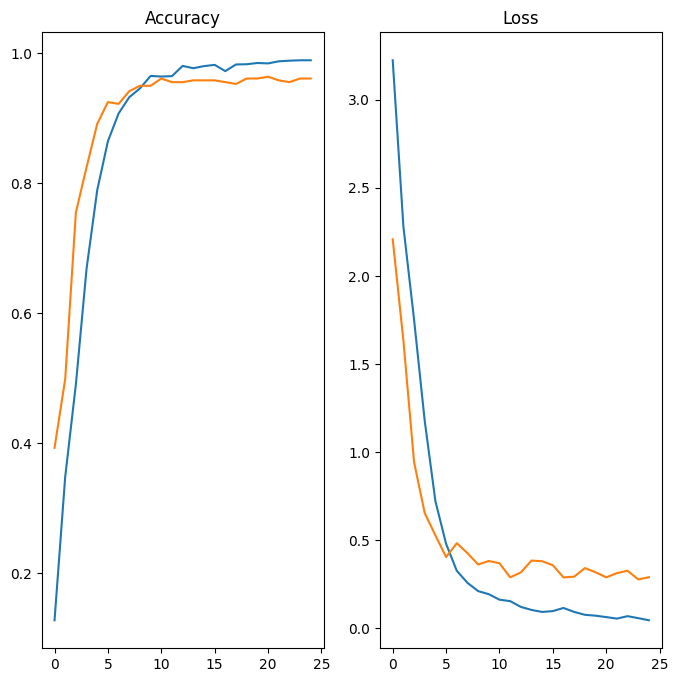

In [23]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

In [65]:
image = 'Banana.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [66]:
Predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [67]:
score = tf.nn.softmax(Predict)

In [68]:
import numpy as np

In [69]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is banana with accuracy of 100.00


In [71]:
model.save('image_classfy.keras')